## Fashion MNIST dataset

This dataset contains 70,000 grayscale images in 10 categories.

The images show individual articles of clothing at low resolution (28 by 28 pixels),

In [0]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [36]:
print("The X_train shape is:",X_train.shape)
print("The X_test shape is:",X_test.shape)
print()

from collections import Counter

print("The number of examples for each category for training set are:\n",sorted(Counter(y_train).items()))
print()
print("The number of examples for each category for training set are:\n",sorted(Counter(y_test).items()))

The X_train shape is: (60000, 28, 28)
The X_test shape is: (10000, 28, 28)

The number of examples for each category for training set are:
 [(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]

The number of examples for each category for training set are:
 [(0, 1000), (1, 1000), (2, 1000), (3, 1000), (4, 1000), (5, 1000), (6, 1000), (7, 1000), (8, 1000), (9, 1000)]


### Scaling

For better performance we need to scale to (0,1)

In [0]:
X_train = X_train / 255.0

X_test = X_test / 255.0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoc

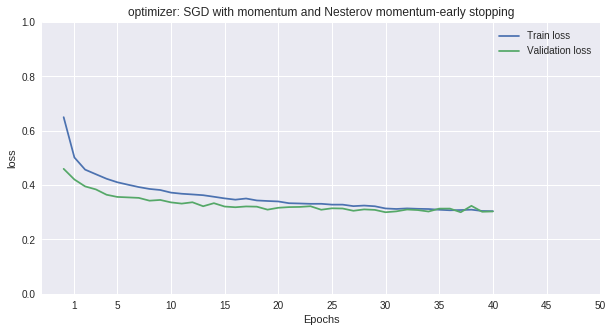

In [41]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import SGD
from tensorflow import set_random_seed
import numpy as np
import matplotlib.pyplot as plt

set_random_seed(432)
np.random.seed(234)
# initialize model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu')) 
model.add(Dense(10,activation='softmax')) 
model.summary()

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

no_epochs = 50

history = model.fit(X_train,y_train, batch_size=32, epochs=no_epochs, verbose=False, validation_split=0.2, callbacks=[es])

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, no_epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("optimizer: SGD with momentum and Nesterov momentum-early stopping")
plt.legend()
plt.show()

In [42]:
pos = np.argmin(history.history['val_loss'])
print("The epoch with the minimum validation loss is:", pos+1)
print("The Train Accuracy is: {0:.5f}".format(history.history['acc'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_acc'][pos]))

The epoch with the minimum validation loss is: 31
The Train Accuracy is: 0.88146
The Validation Accuracy is: 0.88875


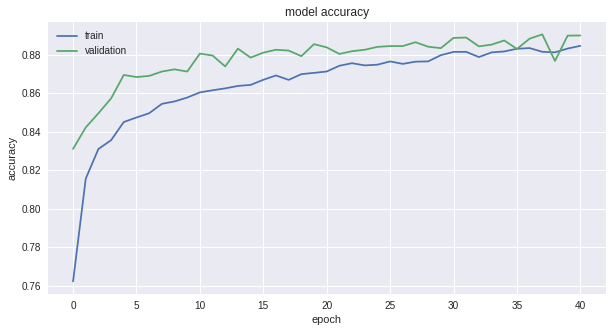

In [43]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()